In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lomb_scargle import lomb_scargle, top_freqs
from util import where, where_eq

In [11]:
cepheid_list = pd.read_csv('cepheid_test_list.csv', index_col=0)
data_epoch = pd.read_csv('epoch_photometry_data_cepheids.csv', index_col=0)

In [12]:
ls_g = lomb_scargle('G', epoch_data=data_epoch, sid_list=cepheid_list['source_id'])

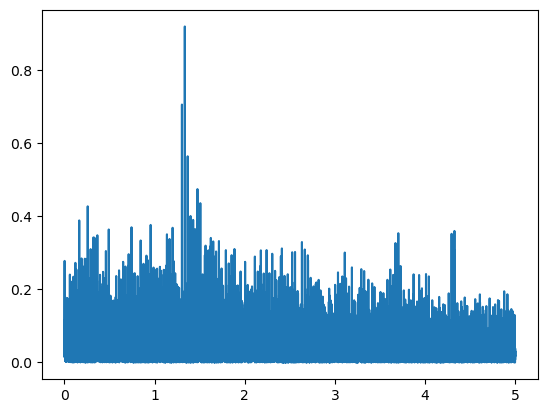

In [4]:
f, p = ls_g[4658075998933503744]
plt.plot(f, p)

In [8]:
def print_phase_curve(sid, band='G', n=3):
    data = where_eq('source_id', sid, df=where_eq('band', band, df=data_epoch))
    f, p = ls_g[sid]
    
    t, mag = data['time'], data['mag']
    t = t - min(t)
    
    fig, ax = plt.subplots(n, figsize=(10, 20))
    for i, freq in enumerate(top_freqs(f, p, n)):
        period = 1/freq
        time = t - divmod(t, period)[0] * period  # shifting data to fit period
        ax[i].scatter(time, mag)
        ax[i].set_title(f'T = {period:.6}')
        
    fig.savefig(f'phase_curves/phase_curve_{sid}.png')
    plt.close(fig)

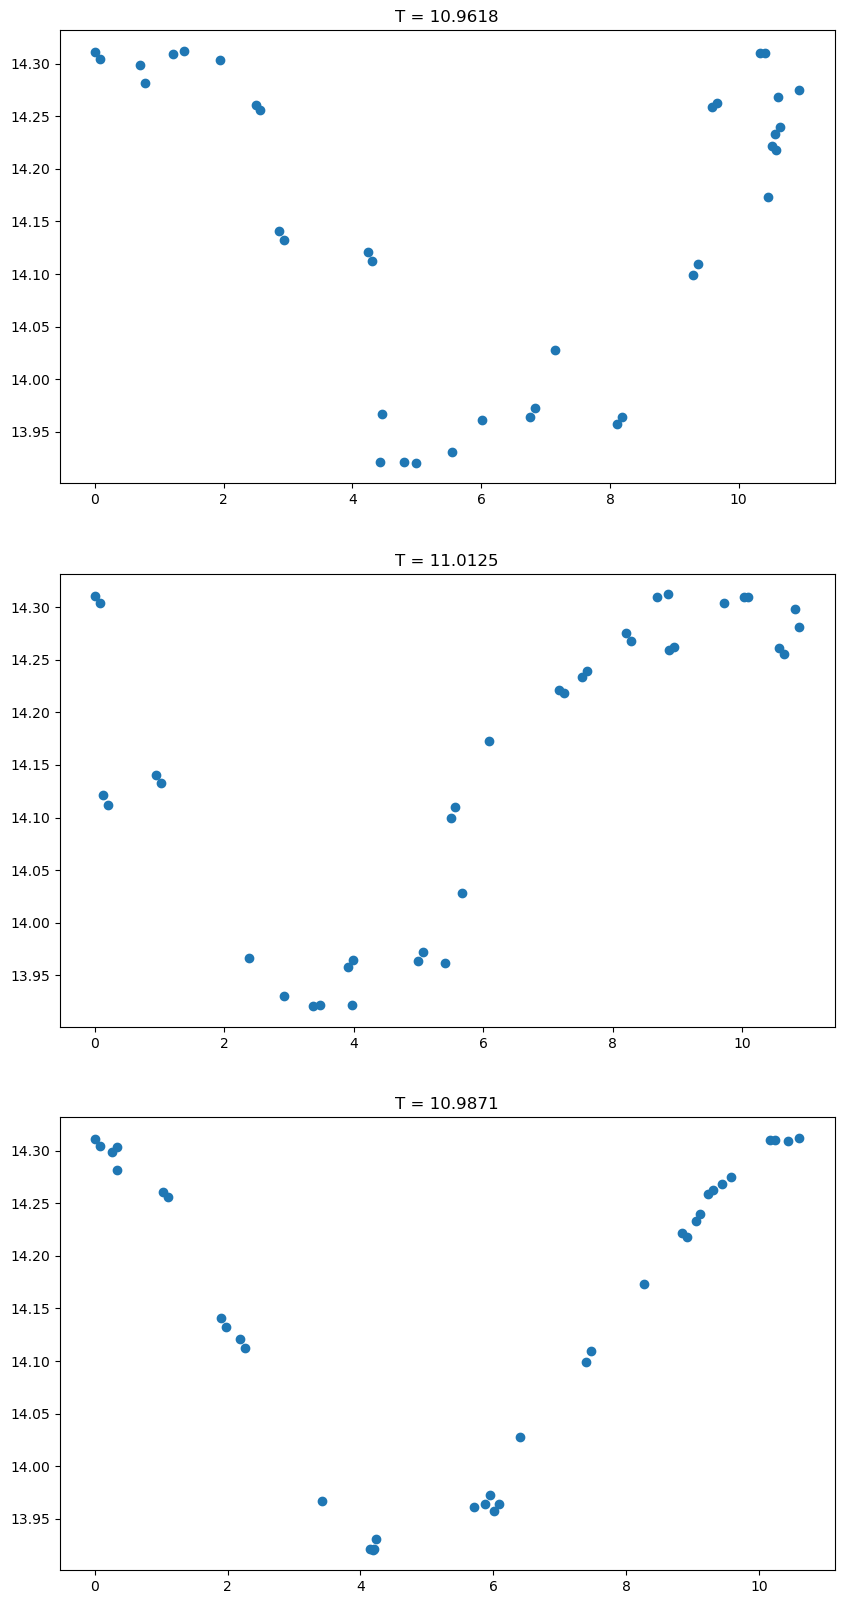

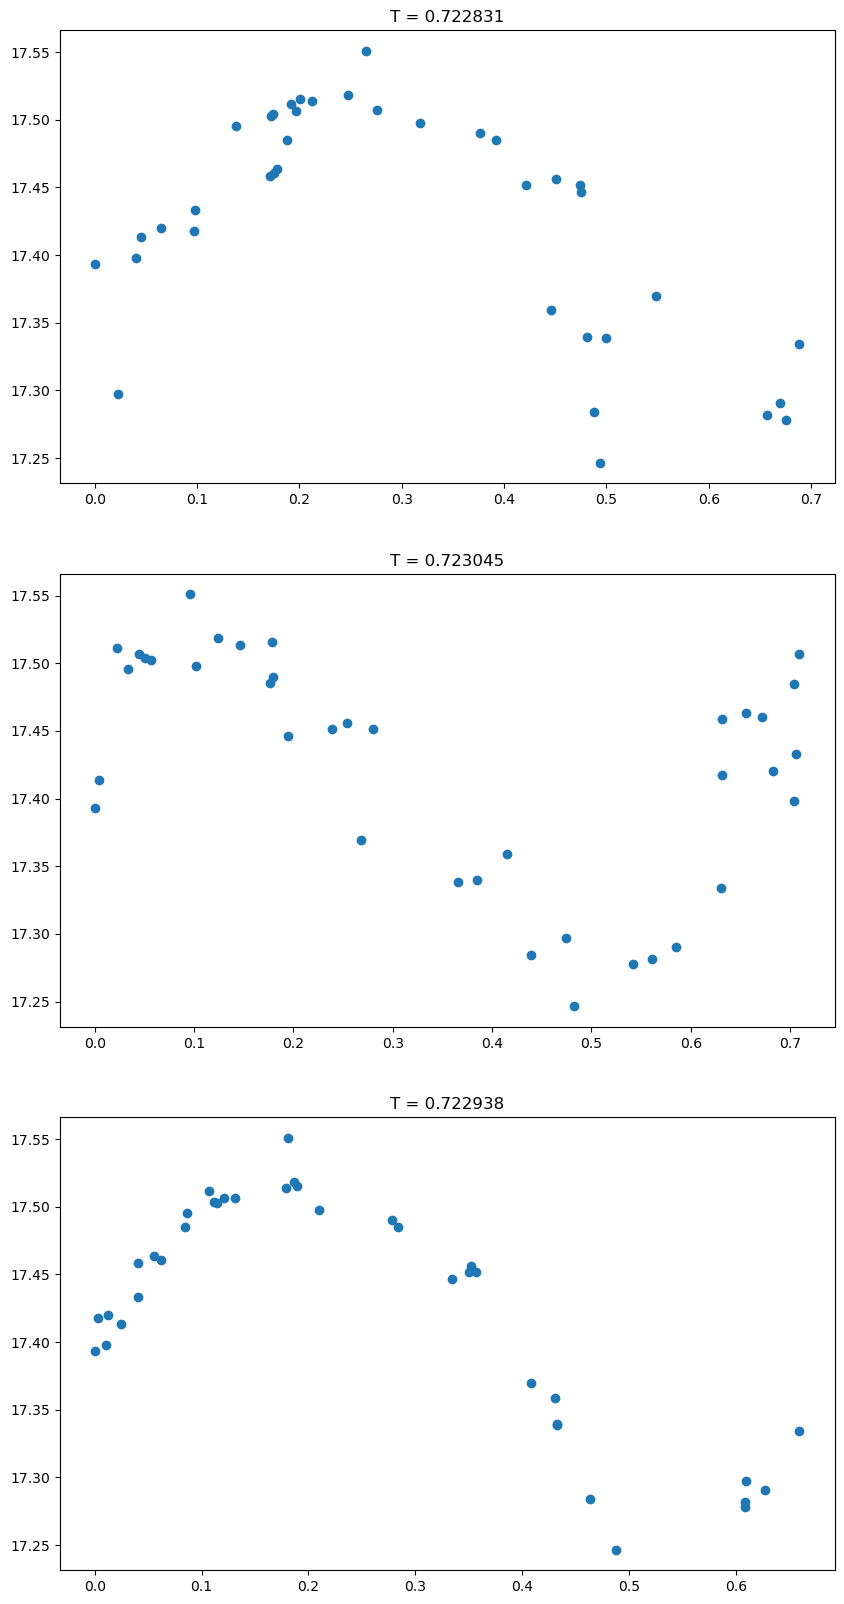

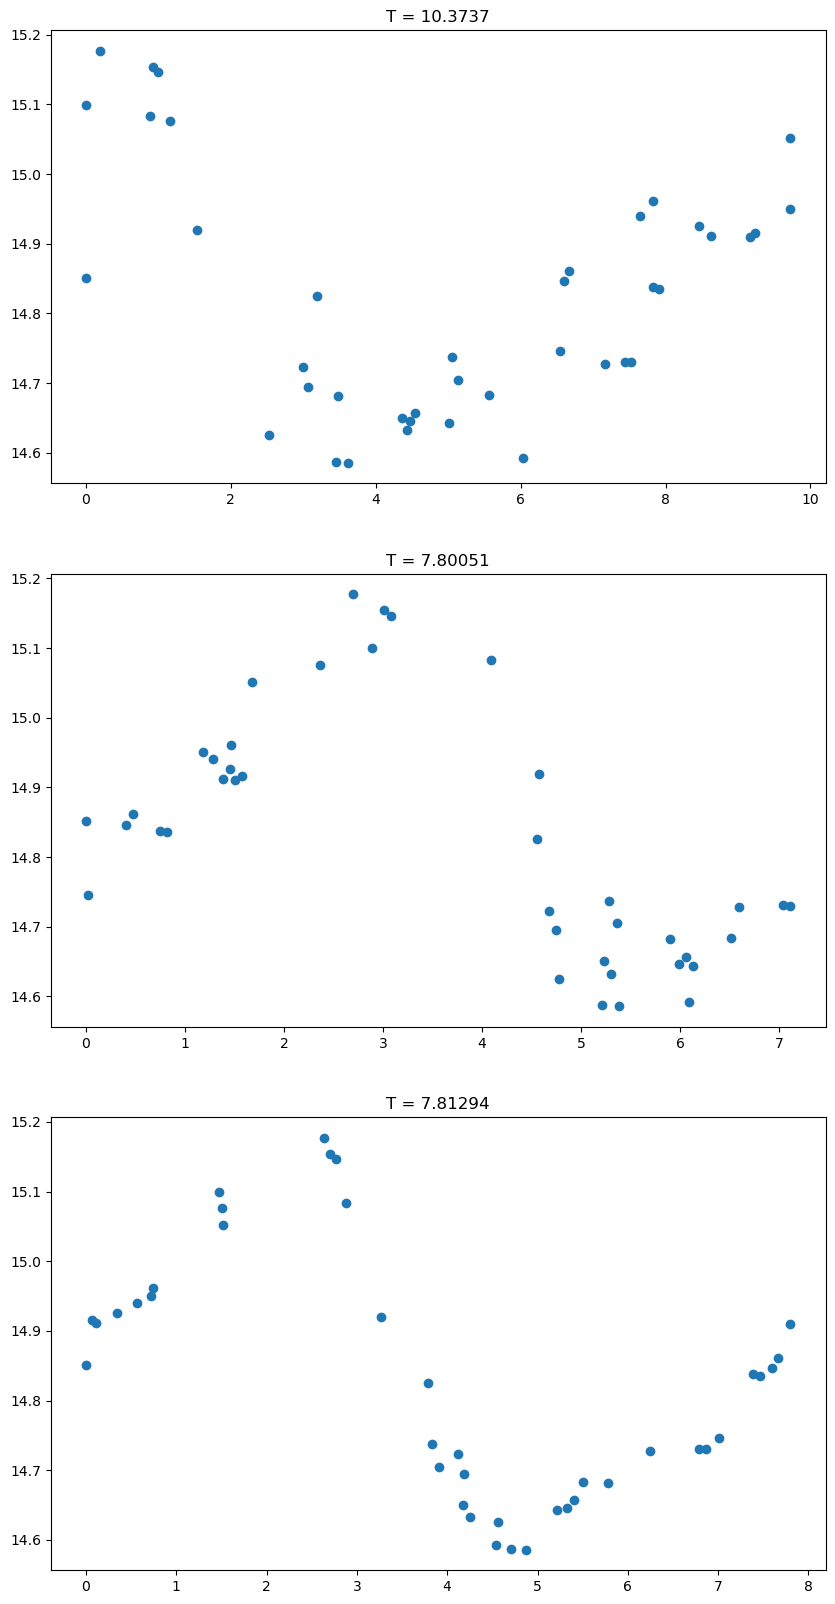

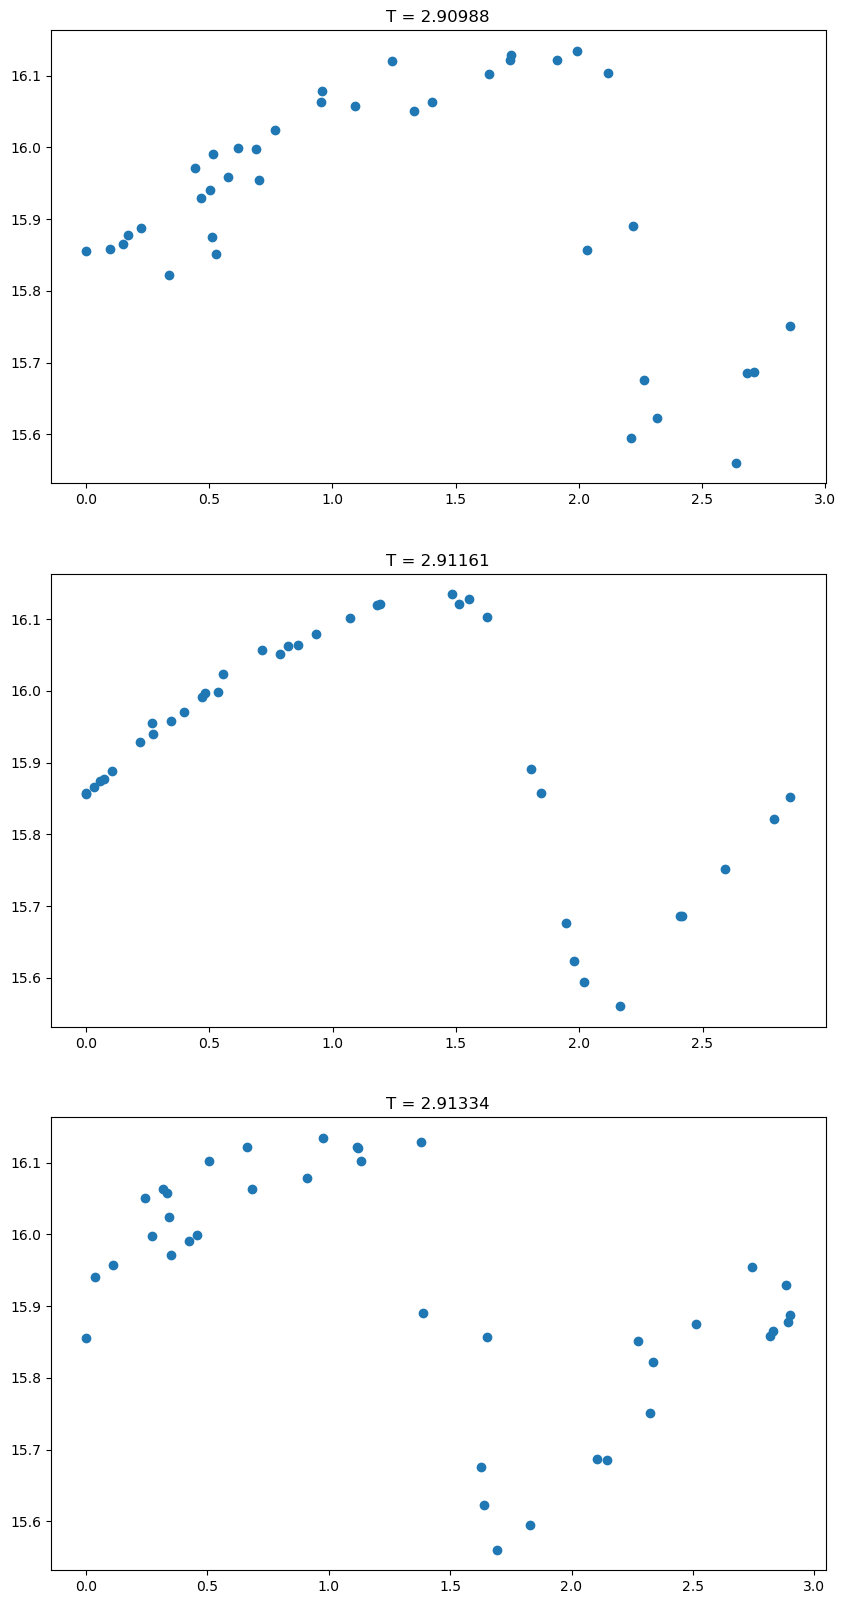

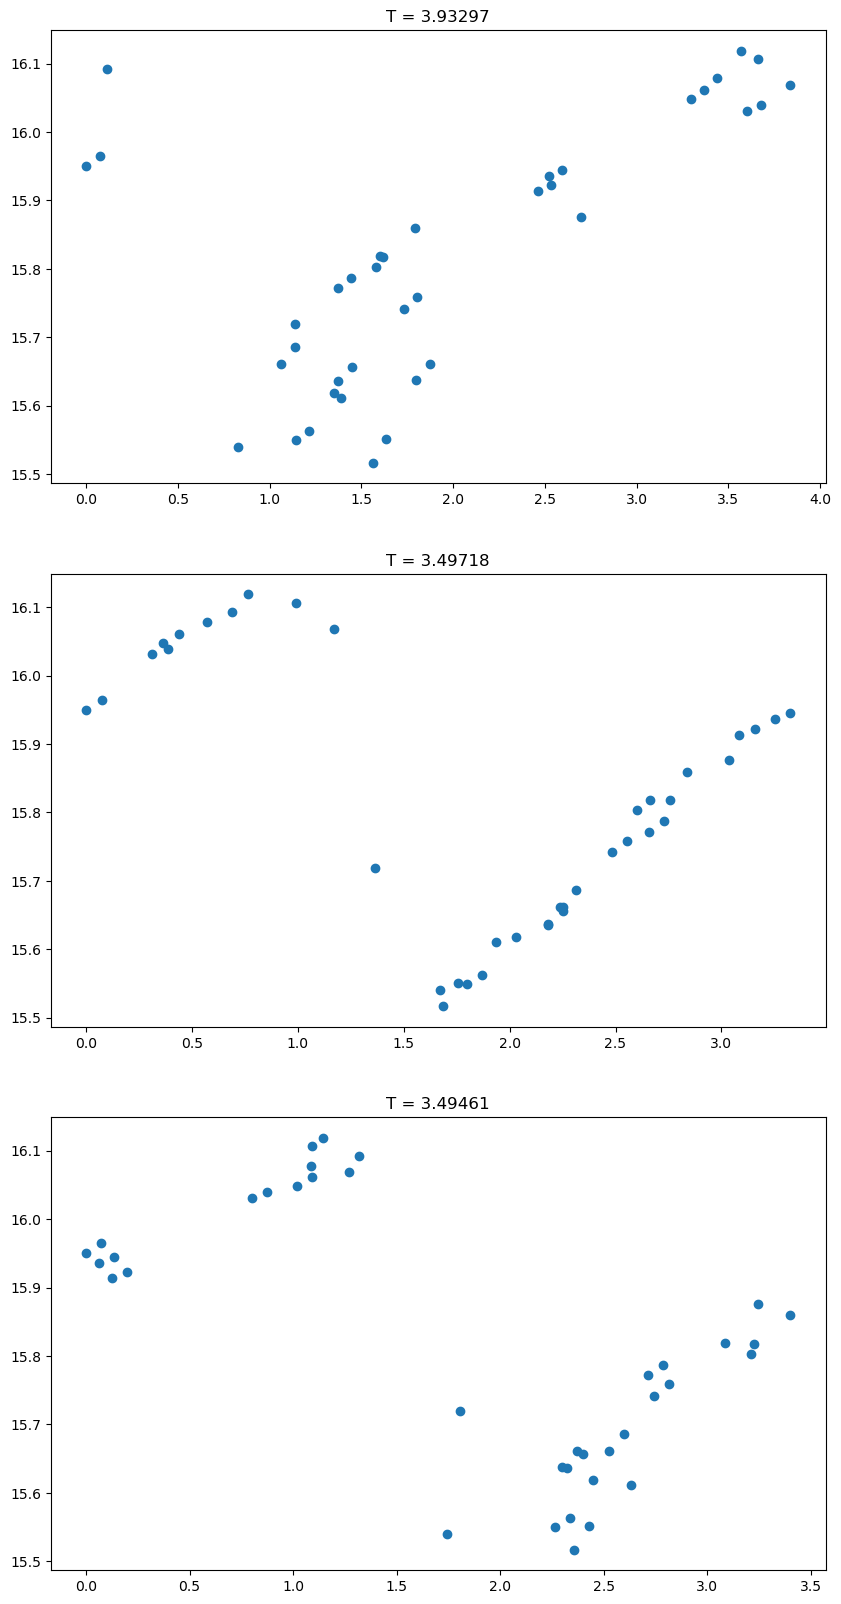

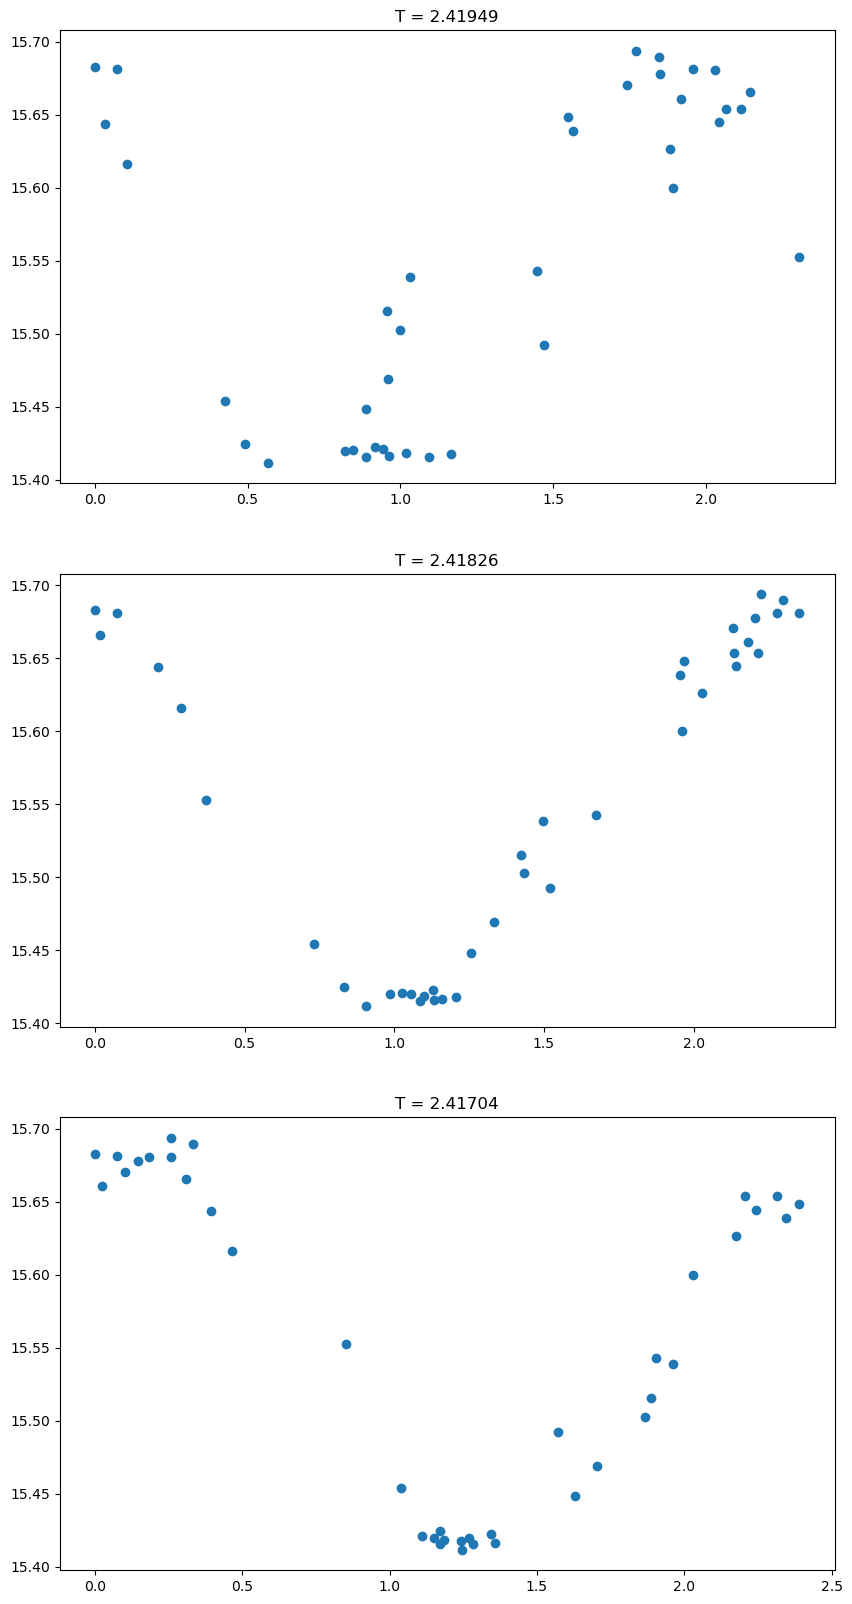

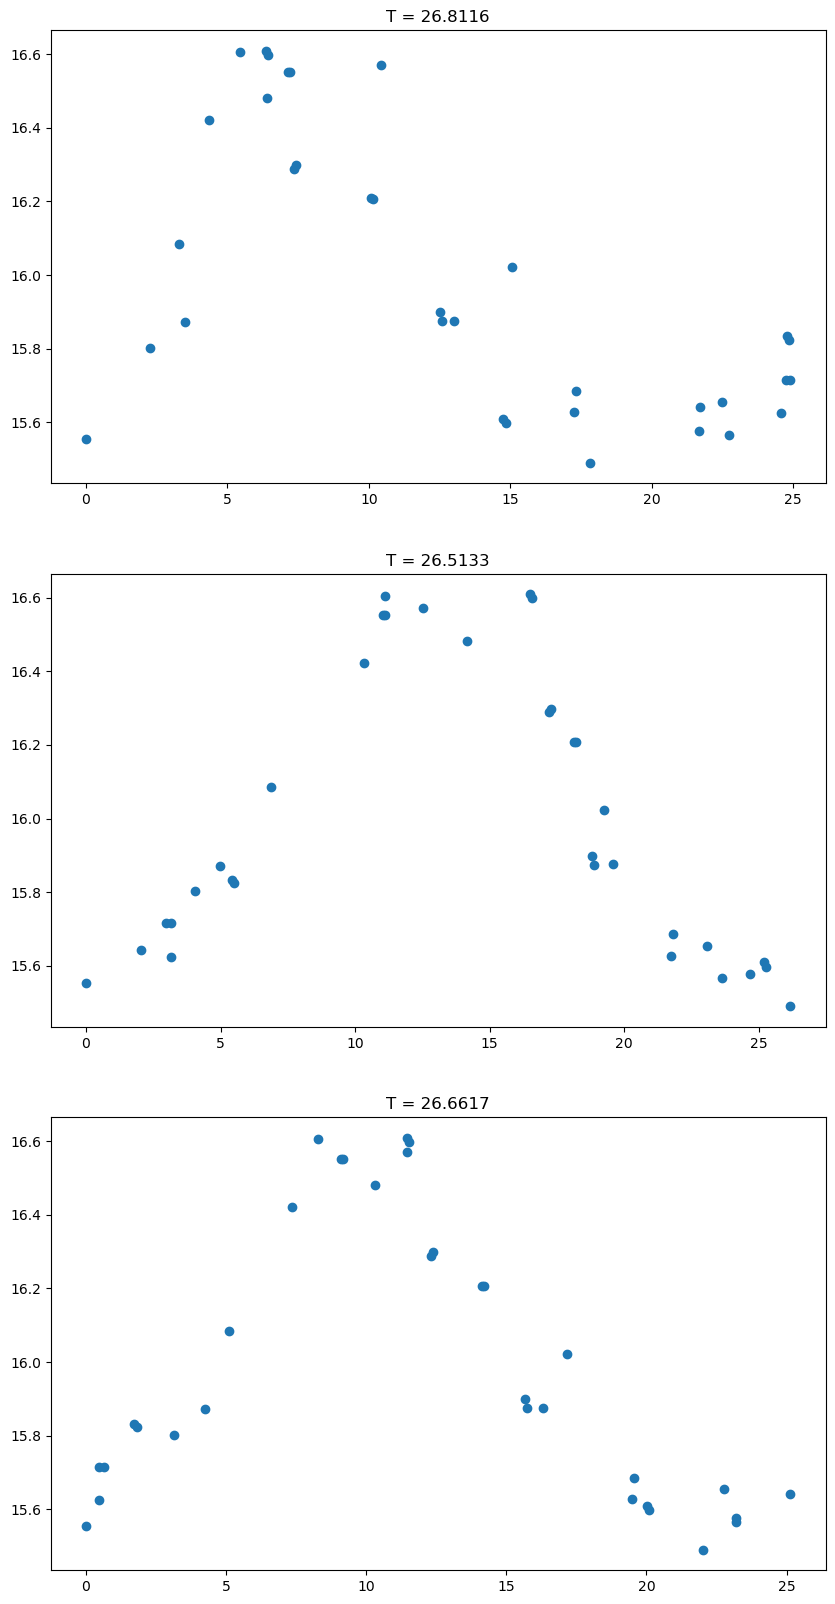

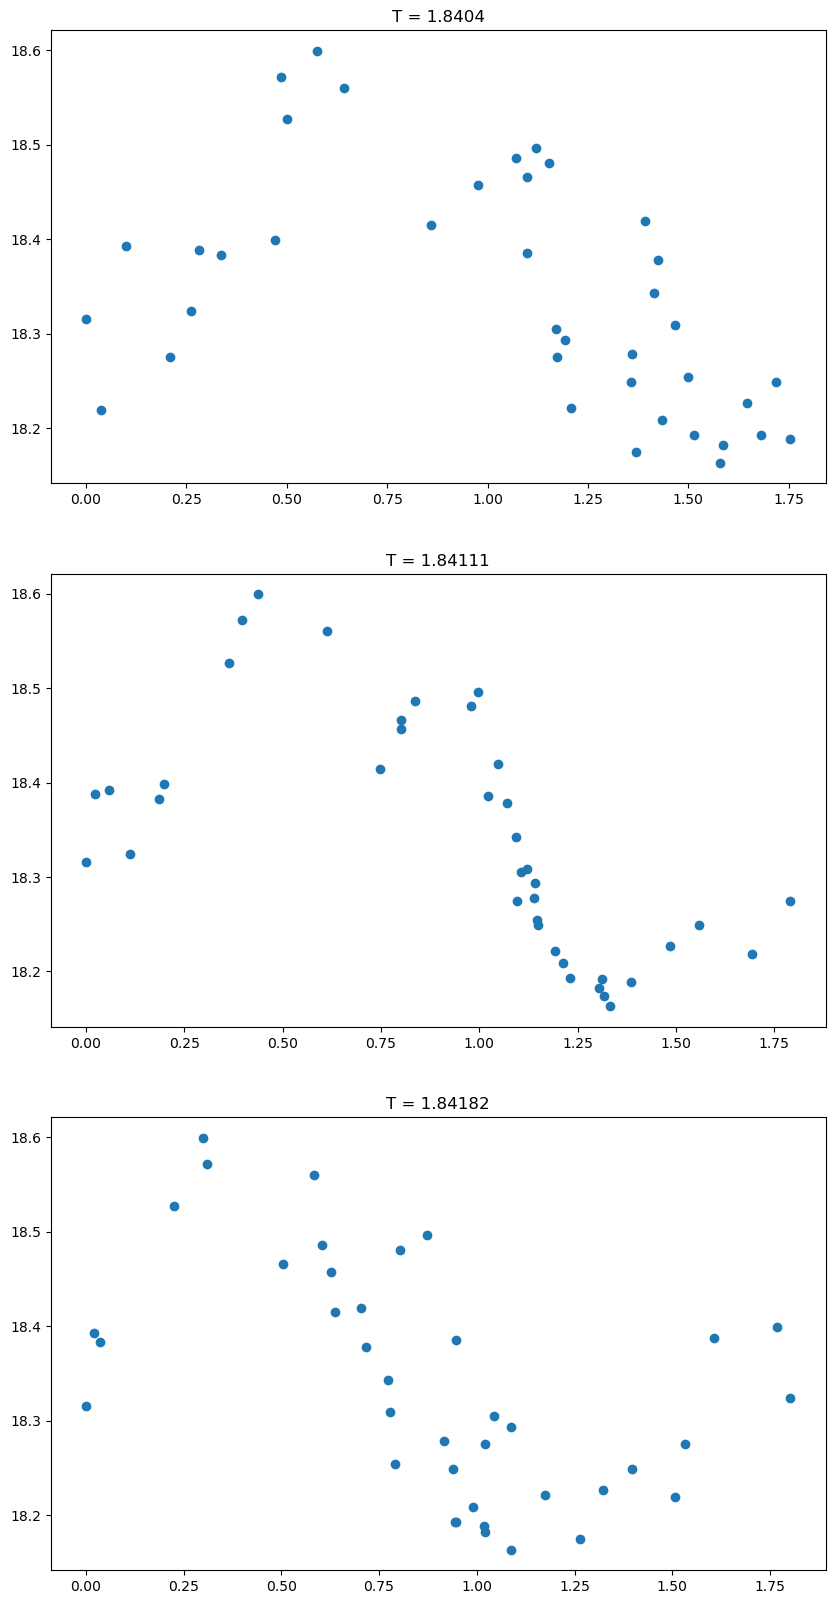

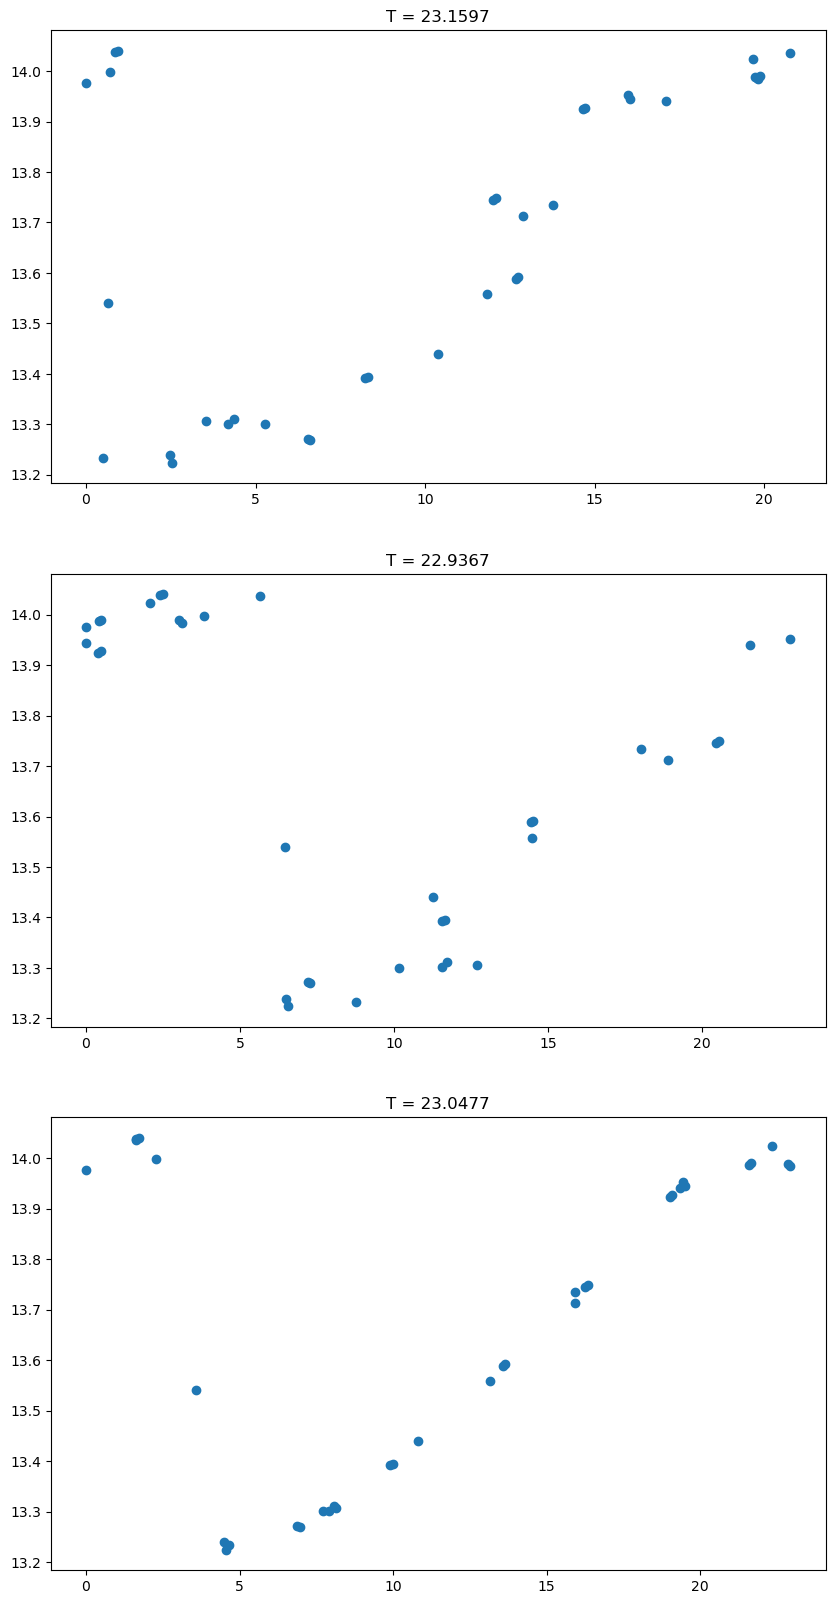

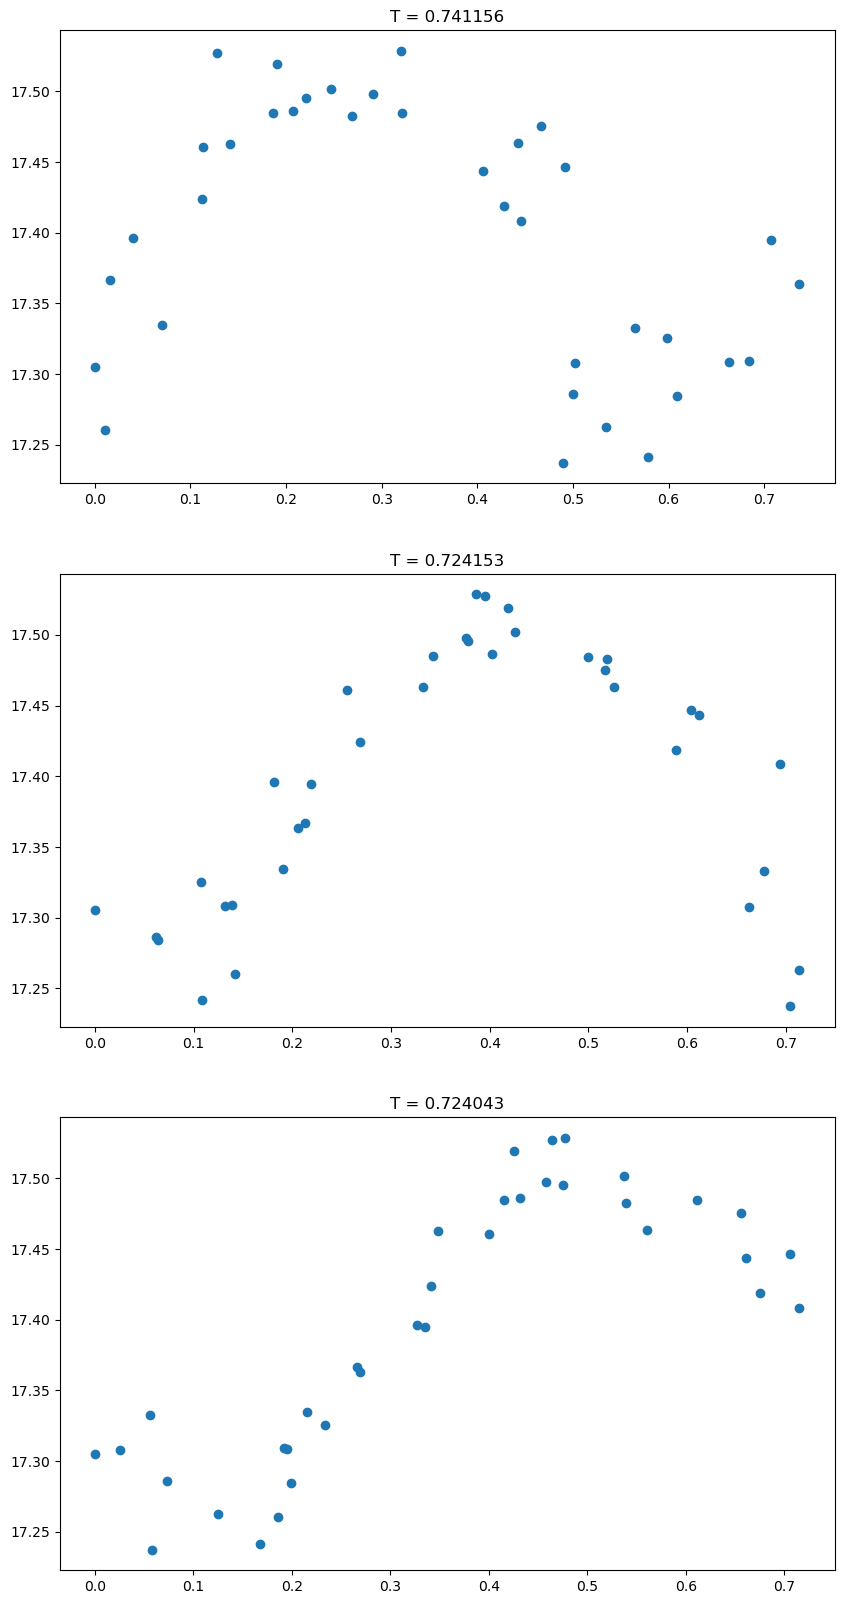

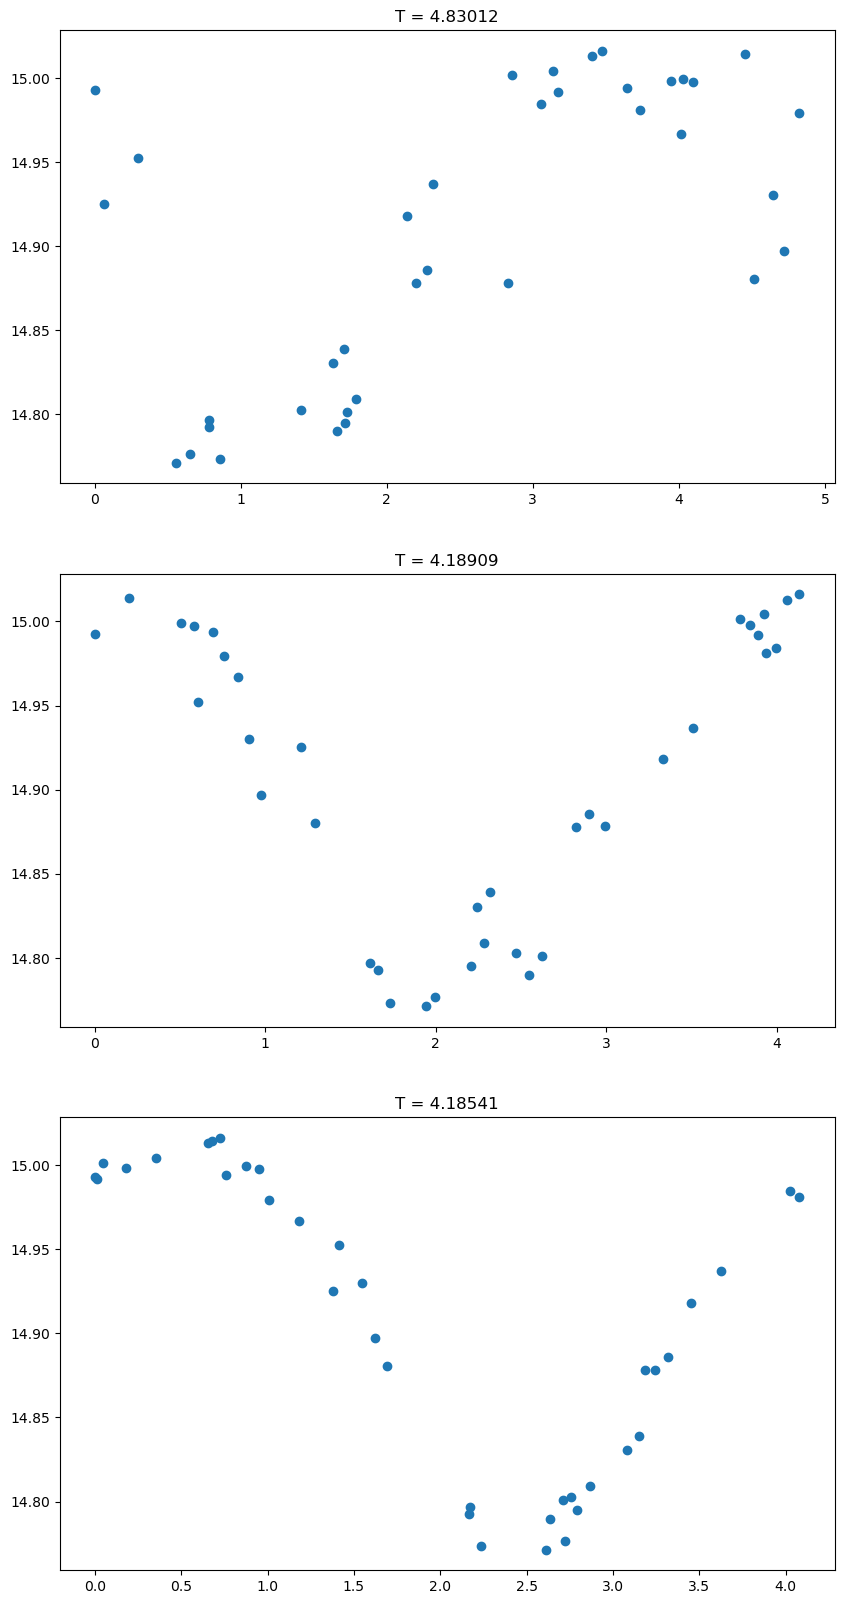

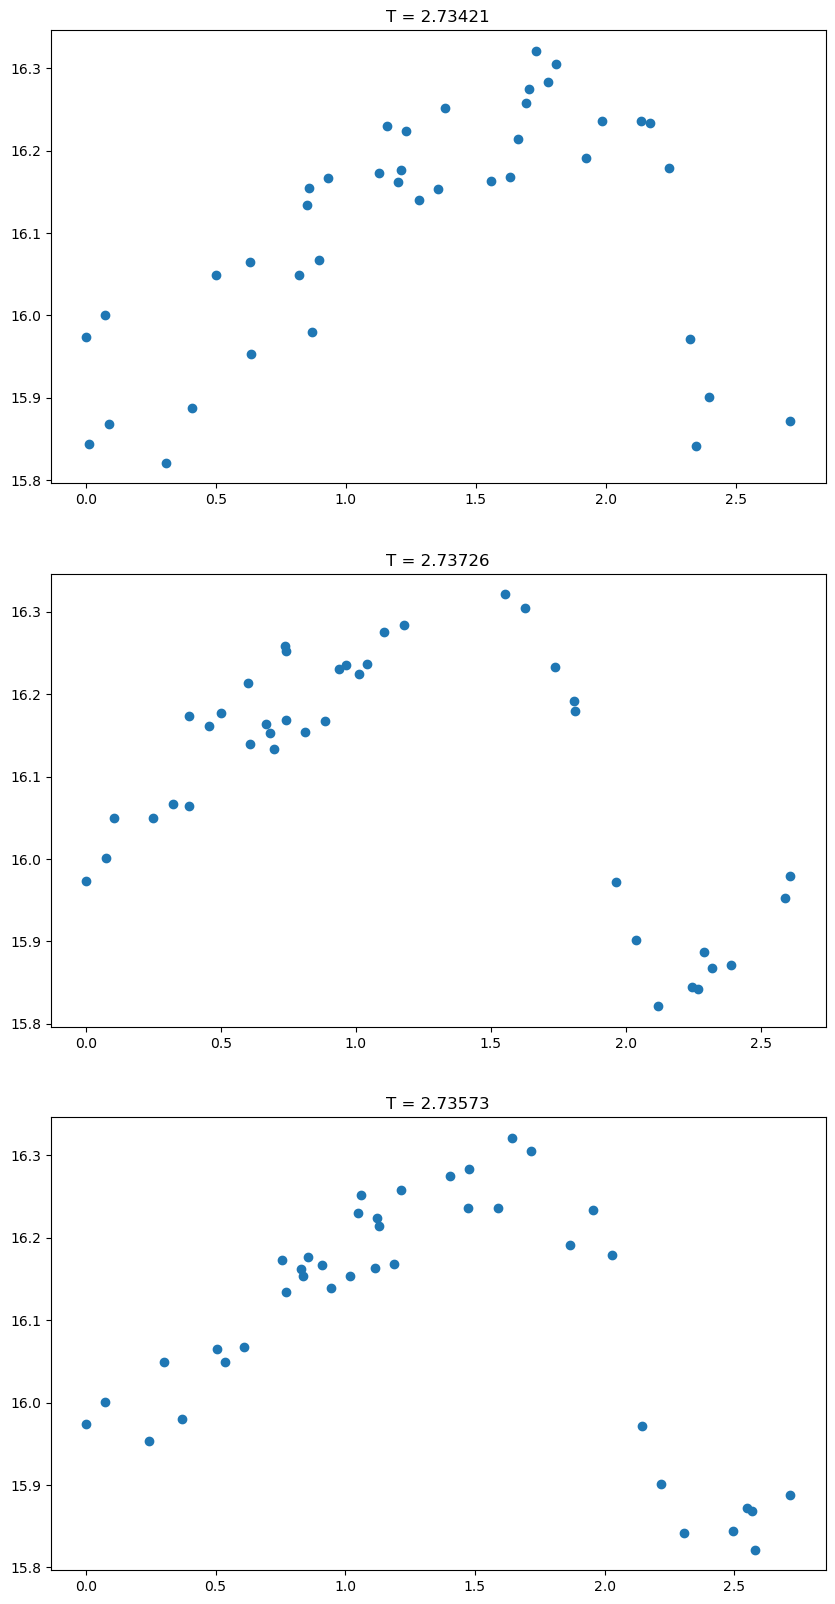

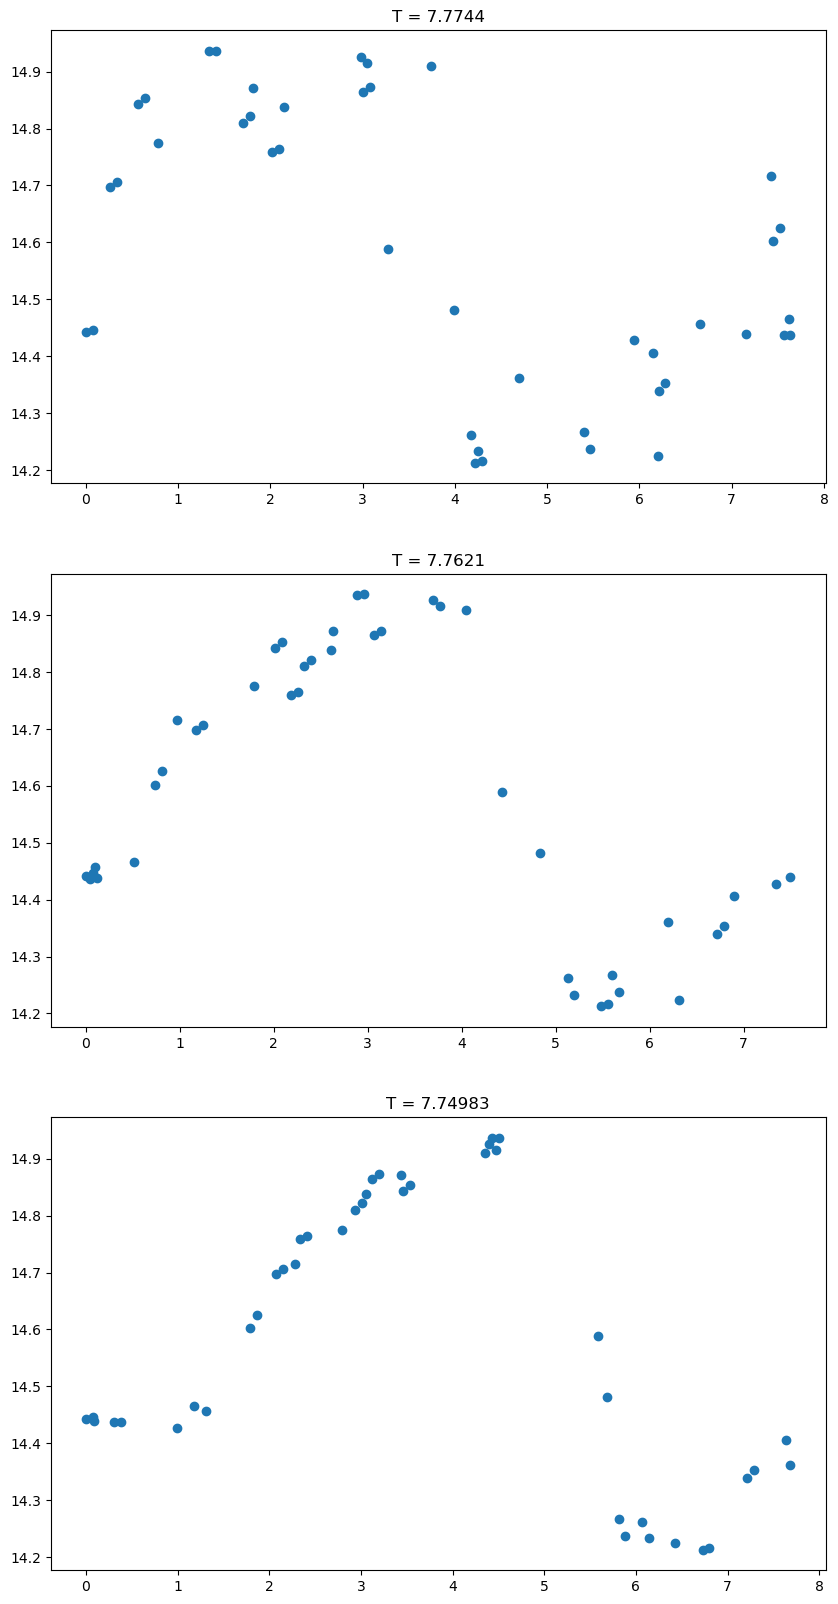

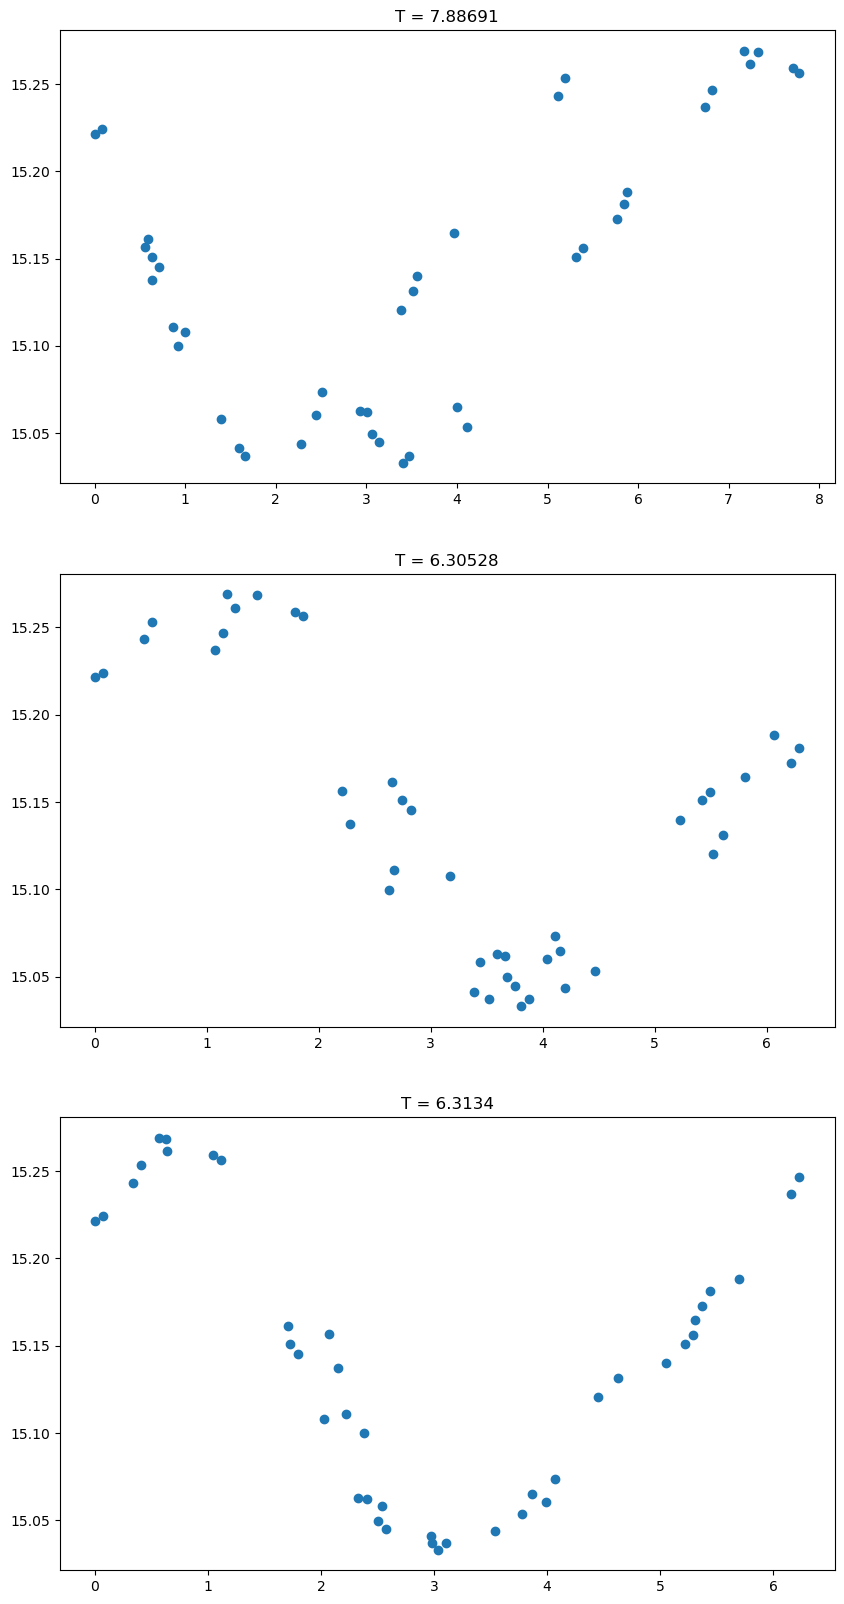

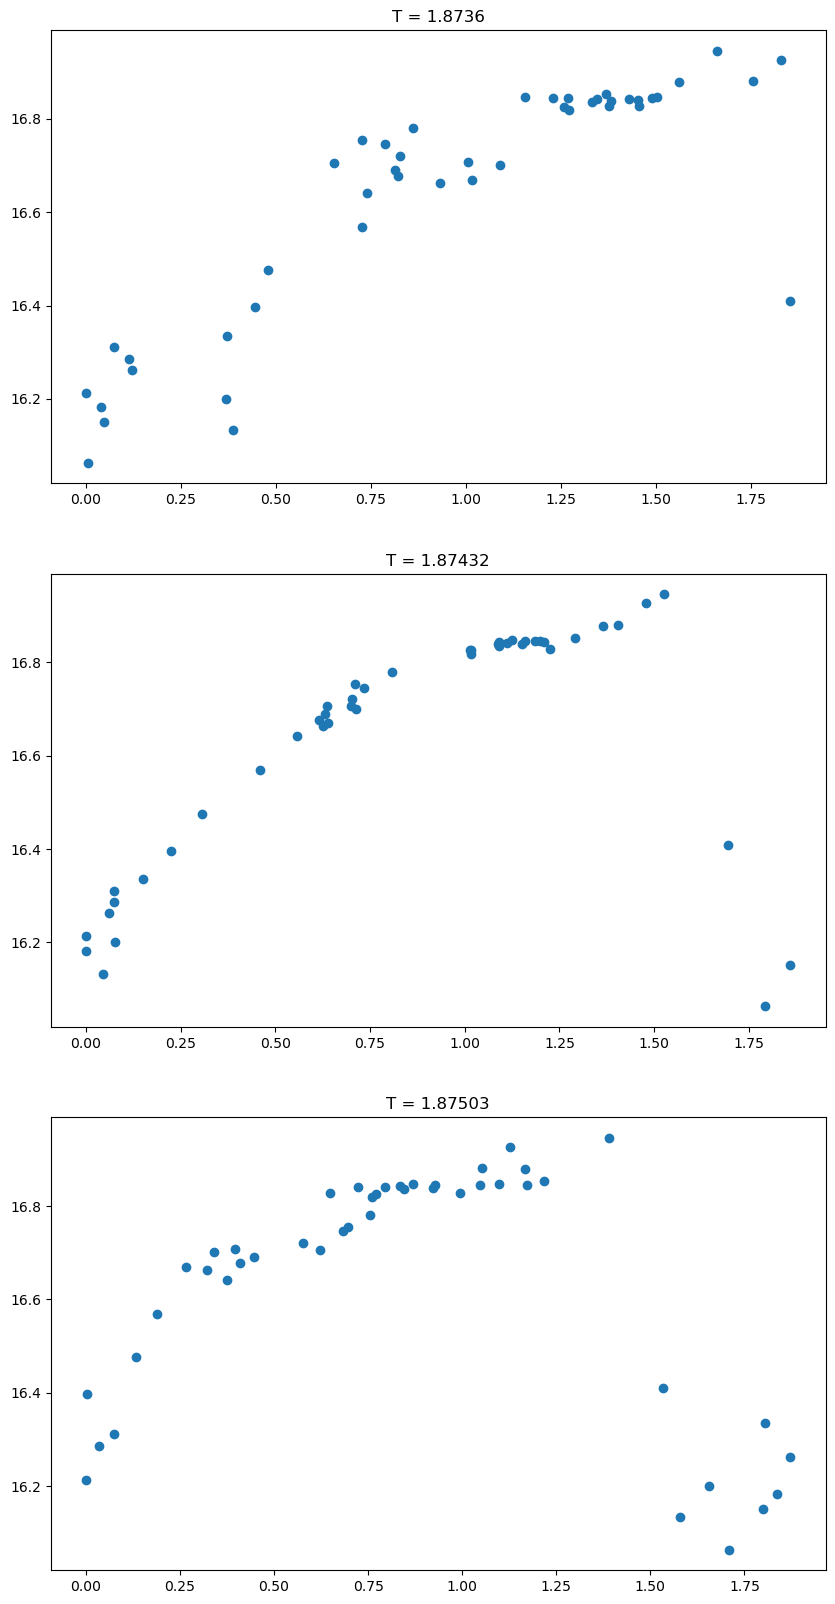

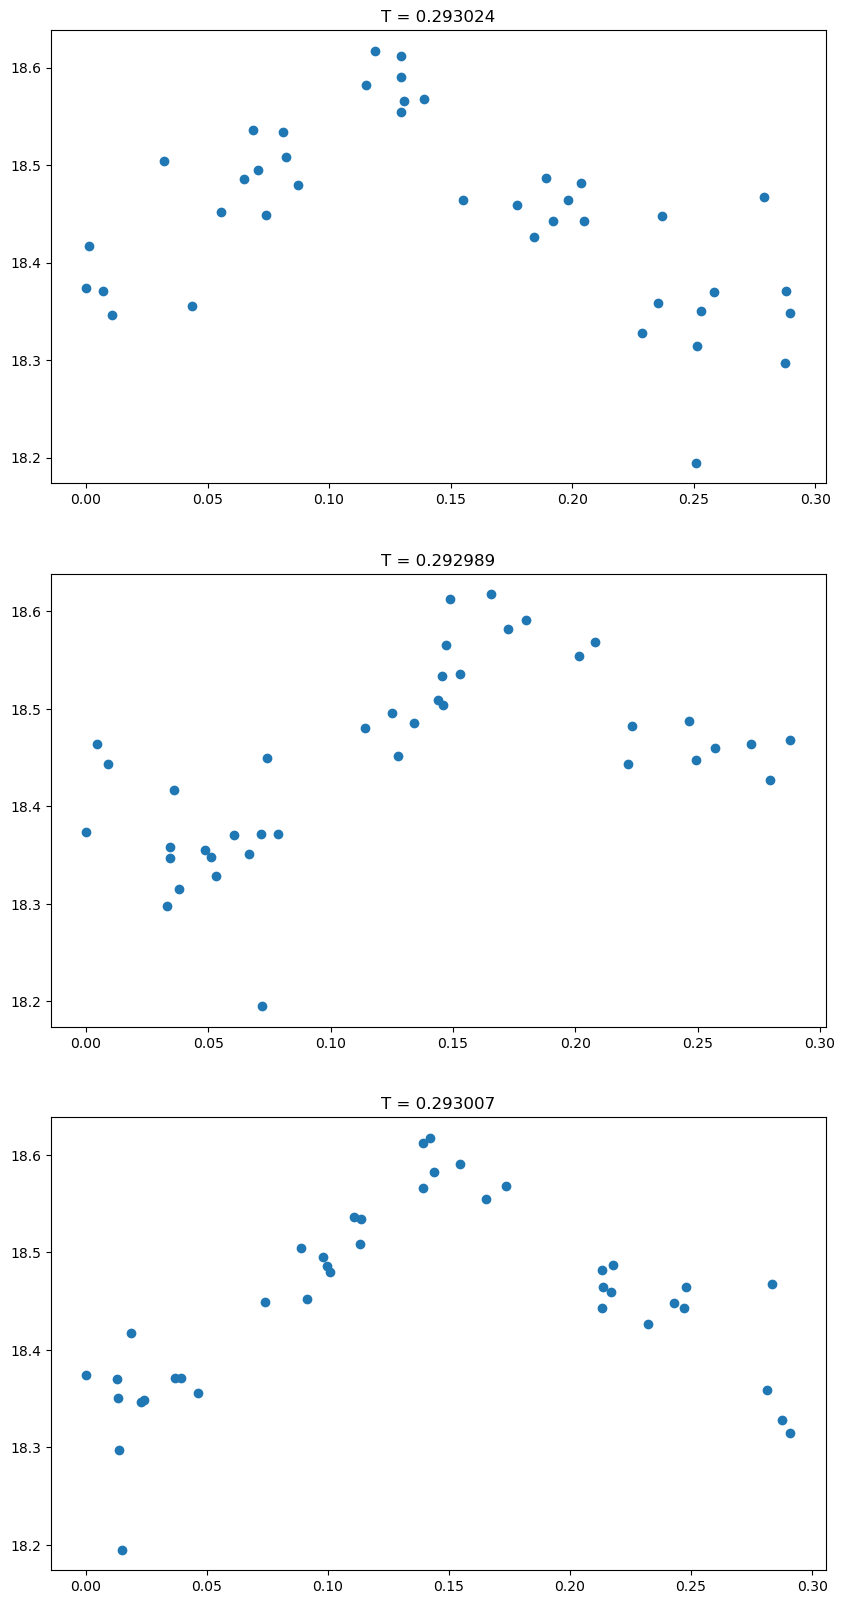

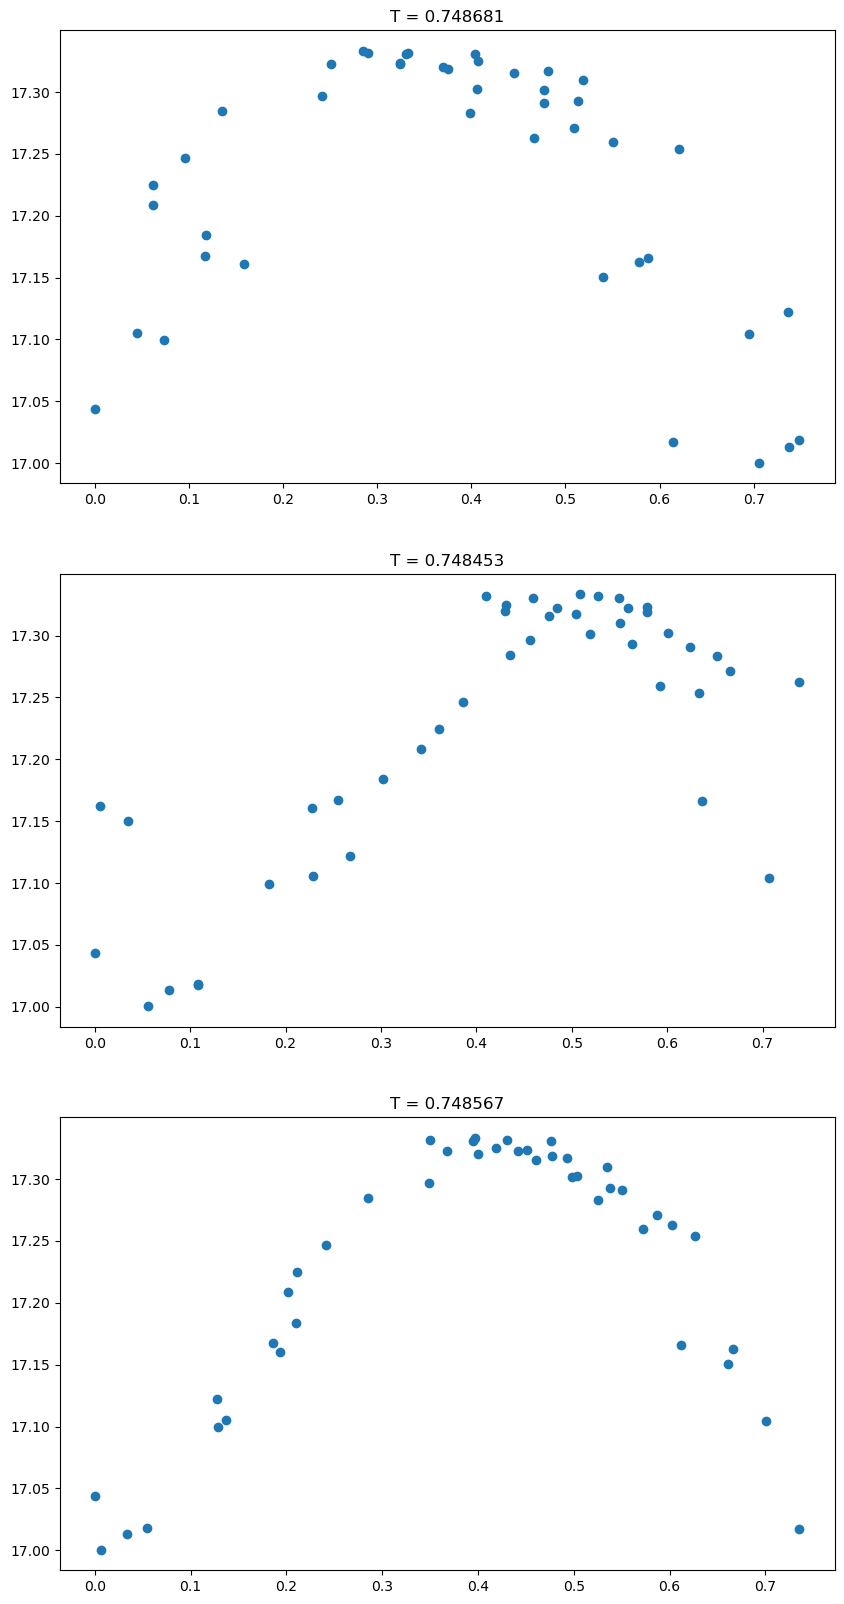

In [9]:
for sid in cepheid_list['source_id']:
    print_phase_curve(sid)

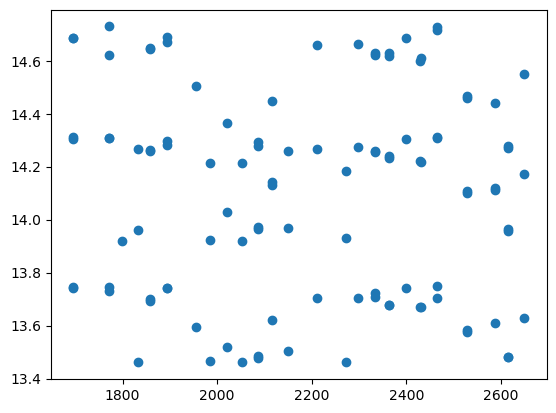

In [7]:
tmp = where_eq('source_id', 4658042287684443648, df=data_epoch)
plt.scatter(tmp.time, tmp.mag)